In [1]:
import os
from preprocessing import pre_processing_data
from bedrock_mistral_prediction import classify_using_llm
import pandas as pd
from model_fine_tuning import get_data_structure_to_predict


In [2]:
file_path = "credit_risk_reto_processed.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    df_processed = pre_processing_data("credit_risk_reto.csv")
    df = classify_using_llm(df_processed)
    df.to_csv(file_path, index=False)

X_train, X_test, y_train, y_test = get_data_structure_to_predict(df)

In [6]:
from sklearn.tree import DecisionTreeClassifier

X_train
# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

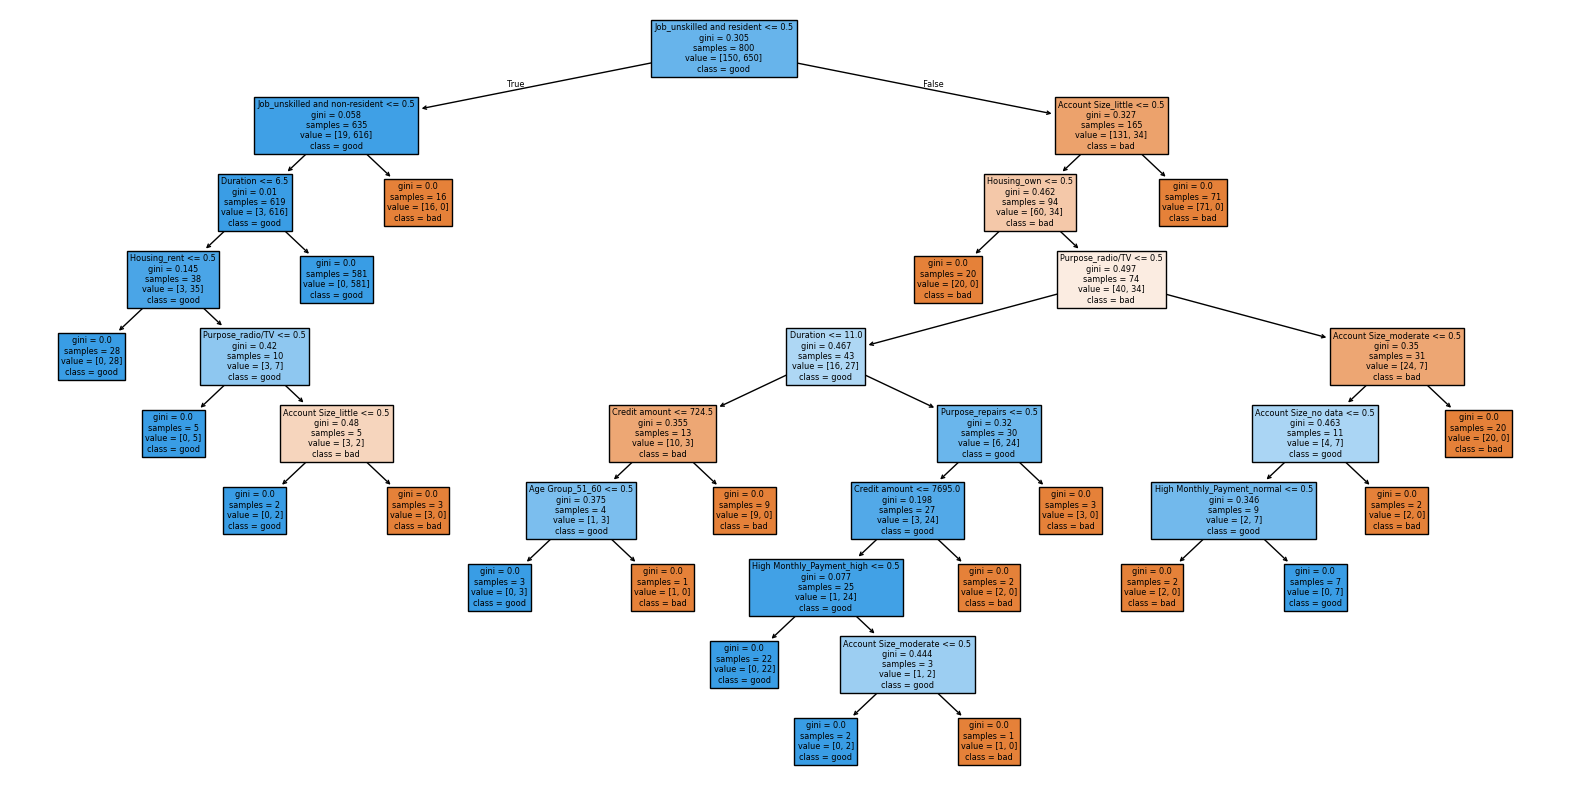

In [7]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=clf.classes_)
plt.savefig("decision_tree.pdf")
plt.show()